In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast.multiseries import export_model_summaries
from scalecast import GridGenerator

In [35]:
# read data
url = "C:/Users/mesut/OneDrive/Masaüstü/python/IBB/"
data = pd.read_csv(url+'veriler2.csv',parse_dates=['Tarih']).sort_values(['Tarih'])


In [36]:
data.head()

,Tarih,Sensor Adi,Arac Sayisi,Haftaici,sicaklik_gunduz,resmi_tatiller,Hastane Sayisi,AVM Sayisi,mesafe,süre,hız,bulut_0,bulut_1,bulut_2
0,2016-01-01,10. Yıl Cad. 2,11328.0,1,6.0,1,10.0,0.0,24.675002,25.971983,57.003739,1,0,0
289537,2016-01-01,TEM Ataşehir Şerifali,82262.0,1,6.0,1,2.0,2.0,32.016597,29.211207,65.762289,1,0,0
287770,2016-01-01,TEM Ataşehir,80511.0,1,6.0,1,0.0,1.0,28.643106,25.129310,68.389714,1,0,0
286103,2016-01-01,TEM Arıcılar,82482.0,1,6.0,1,1.0,2.0,25.147200,22.415948,67.310649,1,0,0
284341,2016-01-01,TEM Altınşehir,60024.0,1,6.0,1,1.0,0.0,39.298925,34.846983,67.665413,1,0,0


In [37]:
data_cali = data.loc[data['Sensor Adi'] == 'TEM Kartal']
data_vali = data.loc[data['Sensor Adi'] == 'D100 Kozyatağı']

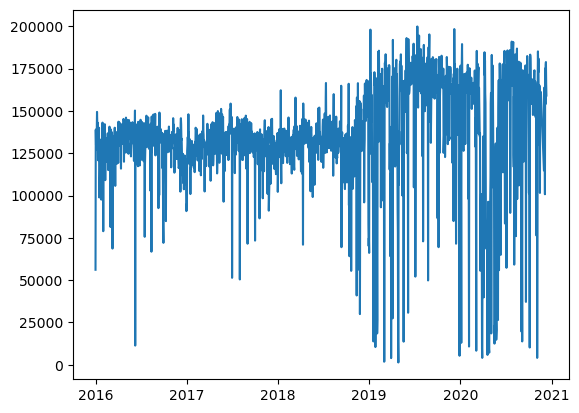

In [38]:
plt.plot(data_cali['Tarih'],data_cali['Arac Sayisi'])

<AxesSubplot: >

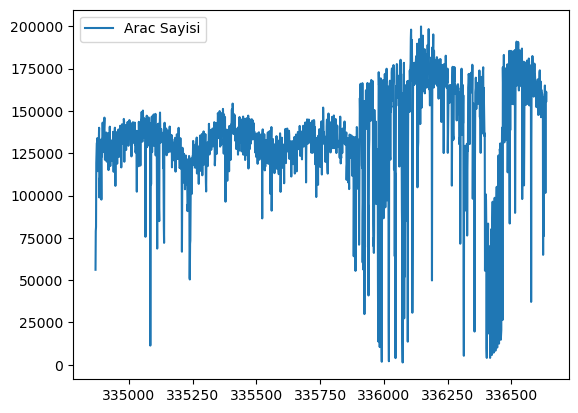

In [39]:
sns.lineplot((data_cali['Tarih'], data_cali['Arac Sayisi']))

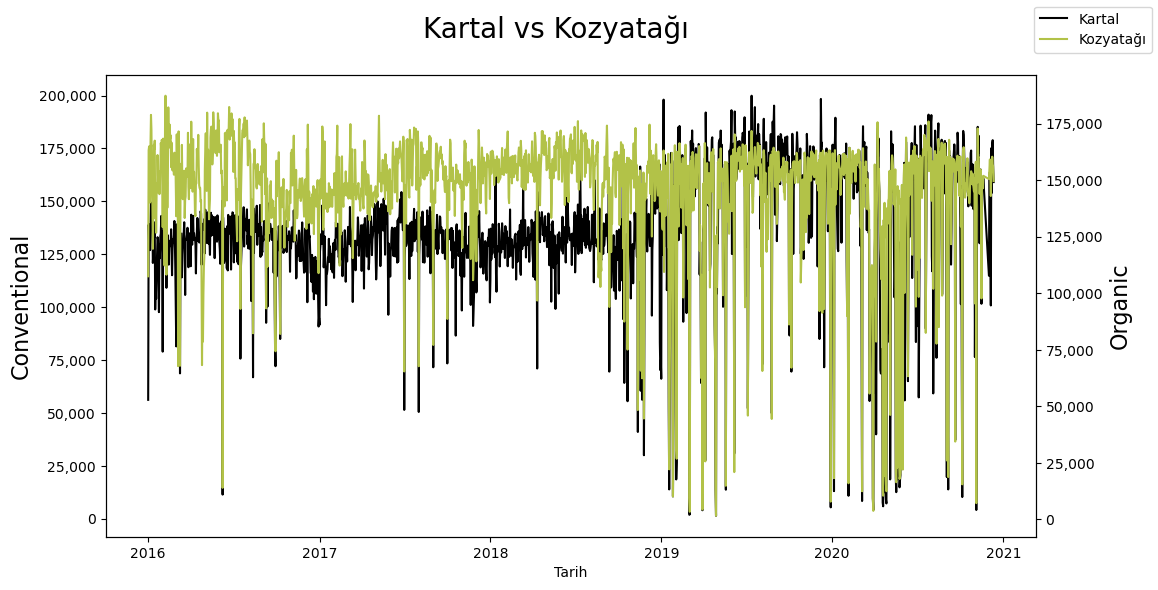

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(
    x='Tarih',
    y='Arac Sayisi',
    data=data_cali,
    label='Kartal',
    ax=ax,
    color='black',
    legend=False
)
plt.ylabel('Conventional',size=16)
ax2 = ax.twinx()
sns.lineplot(
    x='Tarih',
    y='Arac Sayisi',
    data=data_vali,
    label='Kozyatağı',
    ax=ax2,
    color='#B2C248',
    legend=False
)
ax.figure.legend()
plt.ylabel('Organic',size=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle('Kartal vs Kozyatağı',size=20)
plt.show()

In [41]:
corr = np.corrcoef(data_cali['Arac Sayisi'].values,data_vali['Arac Sayisi'].values)[0,1]
print('{:.2%}'.format(corr))

35.27%


In [42]:
y = data['Arac Sayisi']
X = data.loc[:, data.columns != 'Arac Sayisi']

In [43]:
X.head()

,Tarih,Sensor Adi,Haftaici,sicaklik_gunduz,resmi_tatiller,Hastane Sayisi,AVM Sayisi,mesafe,süre,hız,bulut_0,bulut_1,bulut_2
0,2016-01-01,10. Yıl Cad. 2,1,6.0,1,10.0,0.0,24.675002,25.971983,57.003739,1,0,0
289537,2016-01-01,TEM Ataşehir Şerifali,1,6.0,1,2.0,2.0,32.016597,29.211207,65.762289,1,0,0
287770,2016-01-01,TEM Ataşehir,1,6.0,1,0.0,1.0,28.643106,25.129310,68.389714,1,0,0
286103,2016-01-01,TEM Arıcılar,1,6.0,1,1.0,2.0,25.147200,22.415948,67.310649,1,0,0
284341,2016-01-01,TEM Altınşehir,1,6.0,1,1.0,0.0,39.298925,34.846983,67.665413,1,0,0


In [44]:
y.head()

0         11328.0
289537    82262.0
287770    80511.0
286103    82482.0
284341    60024.0
Name: Arac Sayisi, dtype: float64

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(X['Sensor Adi'])
X.drop("Sensor Adi", axis=1, inplace=True)
X["Sensor Adi"] = label

C:\Users\mesut\AppData\Local\Temp\ipykernel_18184\3203103307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("Sensor Adi", axis=1, inplace=True)
C:\Users\mesut\AppData\Local\Temp\ipykernel_18184\3203103307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sensor Adi"] = label


In [46]:
X.head()

,Tarih,Haftaici,sicaklik_gunduz,resmi_tatiller,Hastane Sayisi,AVM Sayisi,mesafe,süre,hız,bulut_0,bulut_1,bulut_2,Sensor Adi
0,2016-01-01,1,6.0,1,10.0,0.0,24.675002,25.971983,57.003739,1,0,0,1
289537,2016-01-01,1,6.0,1,2.0,2.0,32.016597,29.211207,65.762289,1,0,0,320
287770,2016-01-01,1,6.0,1,0.0,1.0,28.643106,25.129310,68.389714,1,0,0,319
286103,2016-01-01,1,6.0,1,1.0,2.0,25.147200,22.415948,67.310649,1,0,0,318
284341,2016-01-01,1,6.0,1,1.0,0.0,39.298925,34.846983,67.665413,1,0,0,317


In [47]:
import statsmodels.api as sm

In [48]:
X = sm.add_constant(X)
X

,const,Tarih,Haftaici,sicaklik_gunduz,resmi_tatiller,Hastane Sayisi,AVM Sayisi,mesafe,süre,hız,bulut_0,bulut_1,bulut_2,Sensor Adi
0,1.0,2016-01-01,1,6.0,1,10.0,0.0,24.675002,25.971983,57.003739,1,0,0,1
289537,1.0,2016-01-01,1,6.0,1,2.0,2.0,32.016597,29.211207,65.762289,1,0,0,320
287770,1.0,2016-01-01,1,6.0,1,0.0,1.0,28.643106,25.129310,68.389714,1,0,0,319
286103,1.0,2016-01-01,1,6.0,1,1.0,2.0,25.147200,22.415948,67.310649,1,0,0,318
284341,1.0,2016-01-01,1,6.0,1,1.0,0.0,39.298925,34.846983,67.665413,1,0,0,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284333,1.0,2020-12-11,1,15.0,0,5.0,2.0,25.961425,24.941810,62.452783,1,0,0,464
533998,1.0,2020-12-11,1,15.0,0,0.0,0.0,46.884054,36.693966,76.662285,1,0,0,10
281726,1.0,2020-12-11,1,15.0,0,0.0,8.0,27.891812,24.351293,68.723609,1,0,0,462
36412,1.0,2020-12-11,1,15.0,0,2.0,4.0,29.954959,26.778017,67.118395,1,0,0,67


In [49]:
model = sm.OLS(y, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                     float64
Tarih              datetime64[ns]
Haftaici                    int64
sicaklik_gunduz           float64
resmi_tatiller              int64
Hastane Sayisi            float64
AVM Sayisi                float64
mesafe                    float64
süre                      float64
hız                       float64
bulut_0                     int64
bulut_1                     int64
bulut_2                     int64
Sensor Adi                  int32
dtype: object. The data was
0          11328.0
289537     82262.0
287770     80511.0
286103     82482.0
284341     60024.0
            ...   
284333     51517.0
533998     42909.0
281726    109652.0
36412      53010.0
257427    126284.0
Name: Arac Sayisi, Length: 543755, dtype: float64
and
         const      Tarih  Haftaici  sicaklik_gunduz  resmi_tatiller  \
0         1.0 2016-01-01         1              6.0               1   
289537    1.0 2016-01-01         1              6.0               1   
287770    1.0 2016-01-01         1              6.0               1   
286103    1.0 2016-01-01         1              6.0               1   
284341    1.0 2016-01-01         1              6.0               1   
...       ...        ...       ...              ...             ...   
284333    1.0 2020-12-11         1             15.0               0   
533998    1.0 2020-12-11         1             15.0               0   
281726    1.0 2020-12-11         1             15.0               0   
36412     1.0 2020-12-11         1             15.0               0   
257427    1.0 2020-12-11         1             15.0               0   

        Hastane Sayisi  AVM Sayisi     mesafe       süre        hız  bulut_0  \
0                 10.0         0.0  24.675002  25.971983  57.003739        1   
289537             2.0         2.0  32.016597  29.211207  65.762289        1   
287770             0.0         1.0  28.643106  25.129310  68.389714        1   
286103             1.0         2.0  25.147200  22.415948  67.310649        1   
284341             1.0         0.0  39.298925  34.846983  67.665413        1   
...                ...         ...        ...        ...        ...      ...   
284333             5.0         2.0  25.961425  24.941810  62.452783        1   
533998             0.0         0.0  46.884054  36.693966  76.662285        1   
281726             0.0         8.0  27.891812  24.351293  68.723609        1   
36412              2.0         4.0  29.954959  26.778017  67.118395        1   
257427             8.0         7.0  26.424787  23.941810  66.222528        1   

        bulut_1  bulut_2  Sensor Adi  
0             0        0           1  
289537        0        0         320  
287770        0        0         319  
286103        0        0         318  
284341        0        0         317  
...         ...      ...         ...  
284333        0        0         464  
533998        0        0          10  
281726        0        0         462  
36412         0        0          67  
257427        0        0         277  

[543755 rows x 14 columns]
before. After,
[ 11328.  82262.  80511. ... 109652.  53010. 126284.]
[[1.0 Timestamp('2016-01-01 00:00:00') 1 ... 0 0 1]
 [1.0 Timestamp('2016-01-01 00:00:00') 1 ... 0 0 320]
 [1.0 Timestamp('2016-01-01 00:00:00') 1 ... 0 0 319]
 ...
 [1.0 Timestamp('2020-12-11 00:00:00') 1 ... 0 0 462]
 [1.0 Timestamp('2020-12-11 00:00:00') 1 ... 0 0 67]
 [1.0 Timestamp('2020-12-11 00:00:00') 1 ... 0 0 277]].

In [30]:
print(model.summary())


NameError: name 'model' is not defined